<a href="https://colab.research.google.com/github/SaraCordovaMero/nuevoProyecto/blob/main/Serie_de_Tiempo_Sara_C%C3%B3rdova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
t = np.array(range(1990,2004))
ingresos = np.array([1202.02, 1262.13, 1232.07, 1382.33, 1322.23, 1352.28, 1346.27, 1370.31, 1479.93, 1553.93, 1538.39, 1523.01, 1561.08, 1607.91])

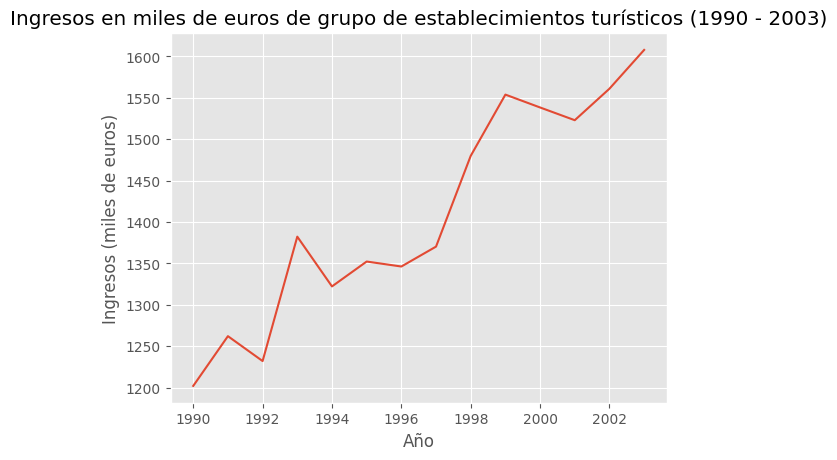

In [ ]:
plt.plot(t,ingresos)
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.show()

In [ ]:
# Hacer media móvil para n = 3
n = 3
k = len(ingresos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(ingresos[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan, 1232.07333333, 1292.17666667,
       1312.21      , 1352.28      , 1340.26      , 1356.28666667,
       1398.83666667, 1468.05666667, 1524.08333333, 1538.44333333,
       1540.82666667, 1564.        ])

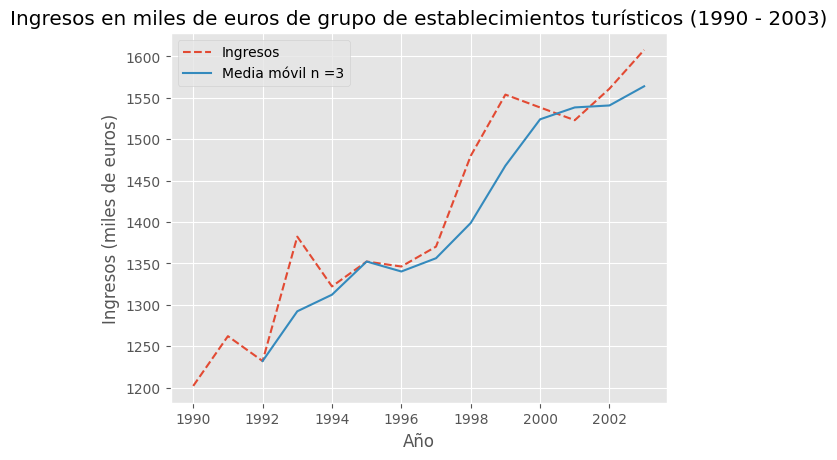

In [ ]:
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

In [ ]:
df_ingresos = pd.DataFrame({'year':t,'ingresos':ingresos})
df_ingresos.set_index('year')
df_ingresos.head()

,year,ingresos
0,1990,1202.02
1,1991,1262.13
2,1992,1232.07
3,1993,1382.33
4,1994,1322.23


In [ ]:
df_ingresos['mmovil'] = df_ingresos['ingresos'].rolling(3).mean()
df_ingresos.head()

,year,ingresos,mmovil
0,1990,1202.02,NaN
1,1991,1262.13,NaN
2,1992,1232.07,1232.073333
3,1993,1382.33,1292.176667
4,1994,1322.23,1312.210000


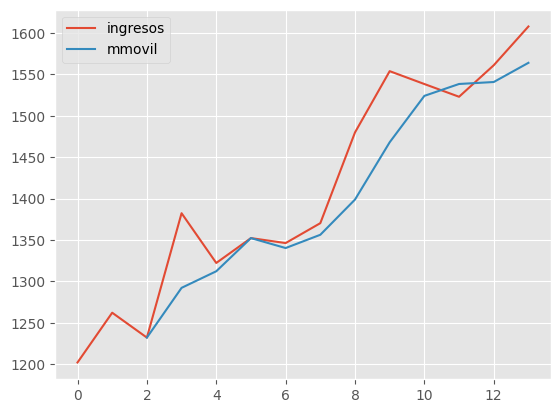

In [ ]:
df_ingresos[['ingresos','mmovil']].plot();

In [ ]:
est = ingresos - mmovil
est

array([            nan,             nan, -3.33333333e-03,  9.01533333e+01,
        1.00200000e+01,  0.00000000e+00,  6.01000000e+00,  1.40233333e+01,
        8.10933333e+01,  8.58733333e+01,  1.43066667e+01, -1.54333333e+01,
        2.02533333e+01,  4.39100000e+01])

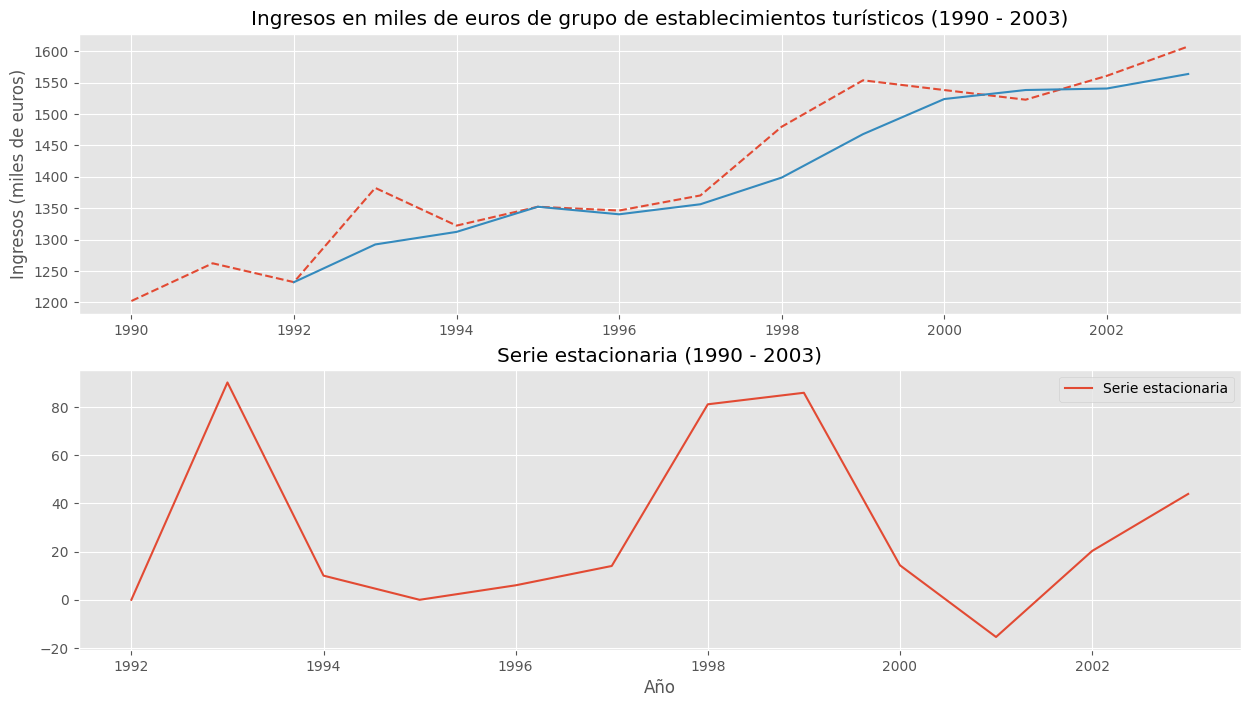

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(t,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

In [ ]:
!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=c6624f71913c71ee6cc98e631861618bb1ceccb1611d73c57fb813e62dba7014
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [ ]:
co2 = data('co2')
co2.head()

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13


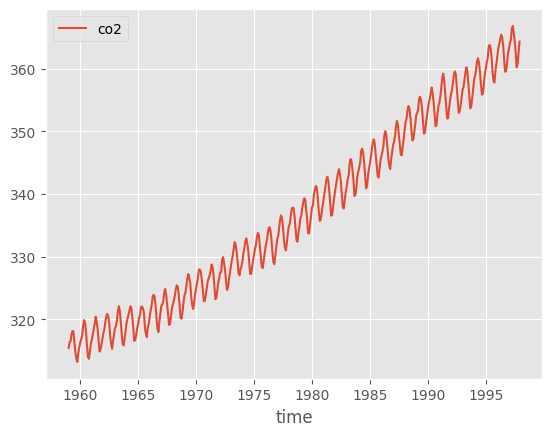

In [ ]:
co2.plot(x='time');

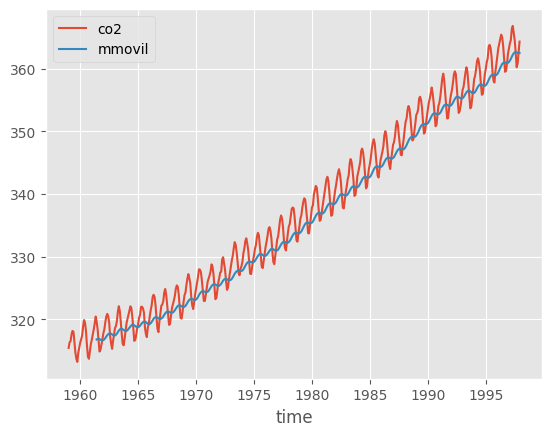

In [ ]:
# Escriba su código aquí
n = 30
co2['mmovil'] = co2['co2'].rolling(n).mean()
co2.plot(x='time');

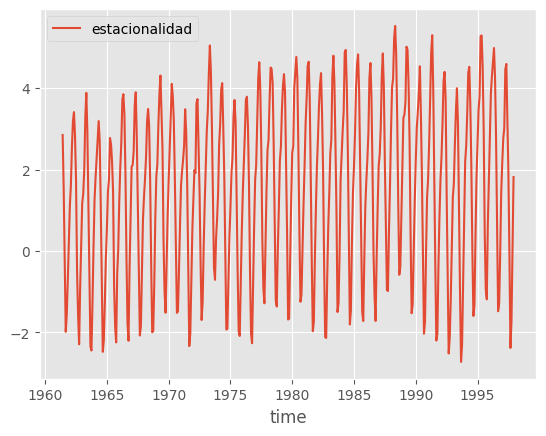

In [ ]:
co2['estacionalidad'] = co2['co2'] - co2['mmovil']
co2[['time','estacionalidad']].plot(x='time');

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2['co2'],model='aditive',\
                                           freq=30)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:
descomposicion.plot();

NameError: name 'descomposicion' is not defined

In [ ]:
# función para transformar los datos a valores trimestrales.
def get_trimestre(t):
  dt = t - int(t)
  if dt <= 0.25:
    trimestre = 1
  elif dt > 0.25 and dt <= 0.5:
    trimestre = 2
  elif dt > 0.5 and dt <= 0.75:
    trimestre = 3
  else:
    trimestre = 4
  return trimestre

co2 = data('co2')
co2['year'] = co2['time'].apply(lambda t: int(t))
co2['trimestre'] = co2['time'].apply(get_trimestre)
co2_trim = co2[['year','trimestre','co2']].groupby(['year','trimestre'],\
                                        as_index=False).mean()

In [ ]:
co2_trim.tail()

,year,trimestre,co2
151,1996,4,360.943333
152,1997,1,363.966667
153,1997,2,366.306667
154,1997,3,362.443333
155,1997,4,362.553333


<Axes: >

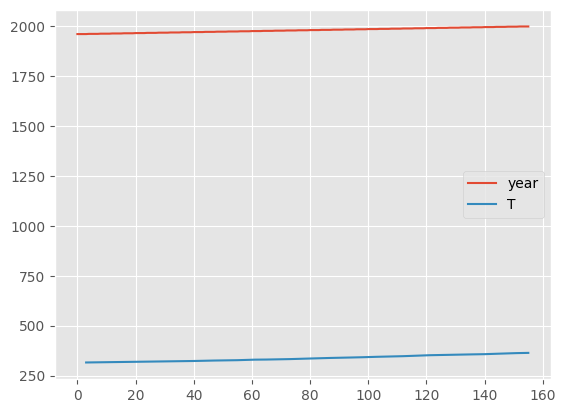

In [ ]:
# Escriba su código aquí
co2_trim["T"] = co2_trim["co2"].rolling(4) .mean()
co2_trim[["year" , "T"]].plot()

<Axes: xlabel='year'>

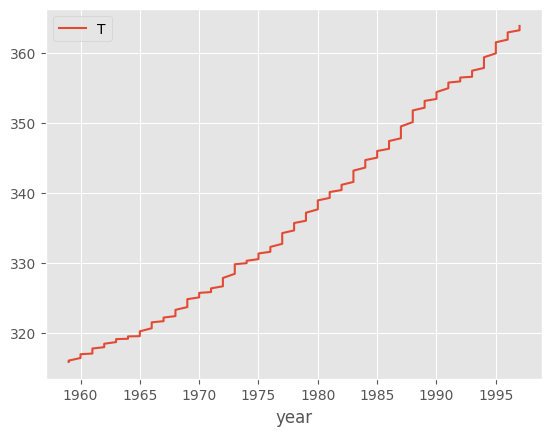

In [ ]:
co2_trim["T"] = co2_trim["co2"].rolling(4, center=True) .mean()
co2_trim[["year", "T"]].plot(x="year")

In [ ]:
co2["T"] = co2_trim["co2"].rolling(4, center=True).mean()
co2_trim["EA"] = co2_trim["co2"]/co2_trim["T"]

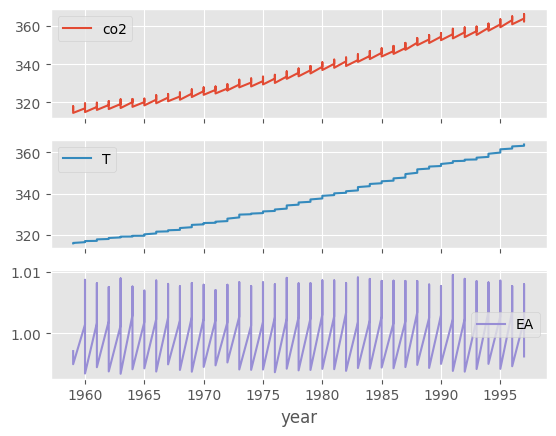

In [ ]:
co2_trim[["year", "co2" , "T" , "EA"]].plot(x="year", subplots=True);

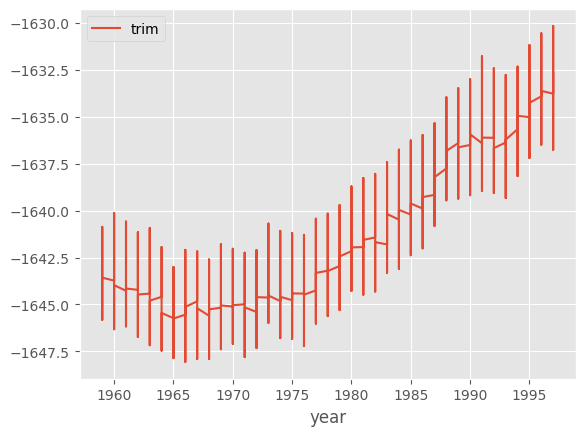

In [ ]:
co2['trim'] = co2['co2'] - co2['year']
co2[['year','trim']].plot(x='year');

In [ ]:
# Escriba su código aquí
co2_trim.head(10)

,year,trimestre,co2,T,EA
0,1959,1,316.076667,NaN,NaN
1,1959,2,317.896667,NaN,NaN
2,1959,3,314.906667,315.825833,0.997090
3,1959,4,314.423333,316.015000,0.994963
4,1960,1,316.833333,316.388333,1.001406
5,1960,2,319.390000,316.640833,1.008682
6,1960,3,315.916667,316.747500,0.997377
7,1960,4,314.850000,316.926667,0.993447
8,1961,1,317.550000,317.024167,1.001659
9,1961,2,319.780000,317.201667,1.008128


In [ ]:
ibve = co2_trim[["trimestre","EA"]].groupby("trimestre",as_index=False).mean()
ibve

,trimestre,EA
0,1,1.002373
1,2,1.008219
2,3,0.997002
3,4,0.994252


In [ ]:
ibve = co2_trim[['trimestre','EA']].groupby('trimestre',as_index=False).mean()
ibve.rename(columns={'EA':'ibve'}, inplace=True)
ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve']/ibve_mean
ibve

,trimestre,ibve,ive
0,1,1.002373,1.001911
1,2,1.008219,1.007754
2,3,0.997002,0.996542
3,4,0.994252,0.993793


In [ ]:
def desestacionar_serie(y,ive):
  trim = int(y[0])
  co2 = y[1]
  return co2/ive[trim-1]

In [ ]:
# Escriba su código aquí
y = np.array(co2_trim["desestacional"])
x = np.array(range(0,len(y)))
regresion = stats.linregress(x,y)
b = regresion.slope #y = a + bx
a = regresion.intercept
print(f"pendiente: {b}")
print(f"intercepto: {a}")
yrl = a + b*x
co2_trim["regresion"] = yrl

KeyError: 'desestacional'

In [ ]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2_trim['co2'],model='multiplicative',\
                                           freq=4)
descomposicion.plot();

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:
# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
#dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
from datetime import date
Activo = 'AAPL'
FechaInicio = '01-01-2019'
FechaFinal = '31-12-2019'
apple = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
apple.index = apple.index.to_period('D')
apple.head(5)

<ipython-input-31-a68afd4a17f6>:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  apple = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)


AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
apple['Adj Close'].plot();

NameError: name 'apple' is not defined

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelo = ARIMA(apple['Adj Close'].iloc[1:], order=(1,0,0))
resultados = modelo.fit(disp=-1, trend='nc')
apple['pronostico'] = resultados.fittedvalues
plot = apple[['Adj Close', 'pronostico']].plot(figsize=(10, 8));

NameError: name 'apple' is not defined

In [ ]:
! pip install pandas_datareader

In [ ]:
Activo = 'EC'
FechaInicio = '01-01-2000'
FechaFinal = date.today()
df = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
df = df[~df.index.duplicated()]
df.head()

AttributeError: 'NoneType' object has no attribute 'group'